In [1]:
import warnings # filtering the warnings (to be careful)
import pandas as pd # to work with tables from .csv files
import numpy as np # for any scientific/mathematical calculation
import statsmodels.tsa.api as smt # statsmodels package already been used in Linear Regression, tsa --> time series analysis
# api --> application programming interface 
import matplotlib.pyplot as plt # to plot, seaborn --> plot, inbuilt plotting tools in pandas, plotly

sales_data = pd.read_csv("Tractor-sales.csv")
sales_data

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


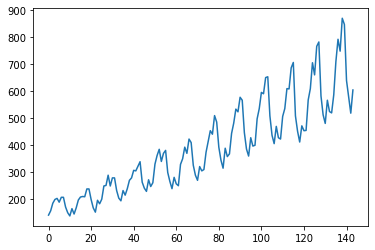

In [2]:
plt.plot(sales_data["Number of Tractor Sold"])
plt.show()
# line-plot --> it is the time-series plot

In [3]:
# Simple Moving Average
rolmean = sales_data["Number of Tractor Sold"].rolling(window=12).mean()
rolstd = sales_data["Number of Tractor Sold"].rolling(window=12).std()

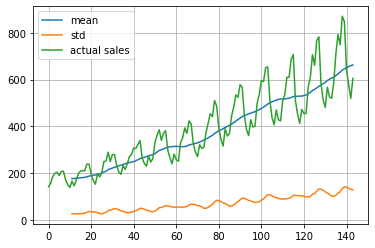

In [8]:
plt.plot(rolmean, label='mean')
plt.plot(rolstd, label='std')
plt.plot(sales_data["Number of Tractor Sold"], label='actual sales')
plt.legend()
plt.grid()
plt.show()

In [9]:
decomposition=smt.seasonal_decompose(sales_data["Number of Tractor Sold"],
                                          model='multiplicative')
# This does not work because we have to convert Normal indexing
# into Date indexing for statsmodels.tsa to work

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [10]:
sales_data['Number of Tractor Sold'] # To show the Example again here we have used this

0      141
1      157
2      185
3      199
4      203
      ... 
139    848
140    640
141    581
142    519
143    605
Name: Number of Tractor Sold, Length: 144, dtype: int64

In [11]:
# Starting Date Indexing, pd.date_range, freq='MS' means Month Start, now it will work
dates = pd.date_range(start='2003-01-01',
                      freq='MS',
                      periods=len(sales_data)) # 144
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [12]:
sales_data.set_index(dates, inplace=True)
sales_data

,Month-Year,Number of Tractor Sold
2003-01-01,Jan-03,141
2003-02-01,Feb-03,157
2003-03-01,Mar-03,185
2003-04-01,Apr-03,199
2003-05-01,May-03,203
...,...,...
2014-08-01,Aug-14,848
2014-09-01,Sep-14,640
2014-10-01,Oct-14,581
2014-11-01,Nov-14,519


In [13]:
sales_data['Number of Tractor Sold']
# Now with date-index,  statsmodels.tsa will work

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Number of Tractor Sold, Length: 144, dtype: int64

In [14]:
decomposition=smt.seasonal_decompose(sales_data["Number of Tractor Sold"])

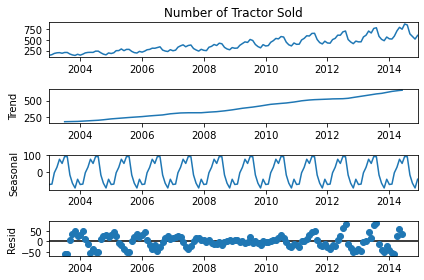

In [15]:
decomposition.plot()
plt.show()

In [16]:
warnings.filterwarnings("ignore")

result_list = []
sr_no = 0
for p_id in range(4):
    for d_id in range(2):
        for q_id in range(2):
            mod = smt.statespace.SARIMAX(sales_data["Number of Tractor Sold"],
                                            order=(p_id, d_id, q_id), # (p, d, q) arima order
                                            seasonal_order=(p_id, d_id, q_id, 12)) #(P, D, Q, periodicity/seasonality)
            result = mod.fit()
            print(sr_no, p_id, d_id, q_id, result.mse)
            result_list.append(result.mse)
            sr_no += 1 # sr_no = sr_no + 1

0 0 0 0 181069.76388888888
1 0 0 1 16221.266943024808
2 0 1 0 525.523296449363
3 0 1 1 497.06196652381834
4 1 0 0 478.6940338998829
5 1 0 1 460.2700861540173
6 1 1 0 496.5607215959453
7 1 1 1 485.30334431684525
8 2 0 0 458.8928009574823
9 2 0 1 451.83293821961456
10 2 1 0 484.3700322920409
11 2 1 1 450.9433614148605
12 3 0 0 446.7044445427705
13 3 0 1 423.8502620644351
14 3 1 0 480.1093736423388
15 3 1 1 449.69853620020086


In [18]:
result_list

[181069.76388888888,
 16221.266943024808,
 525.523296449363,
 497.06196652381834,
 478.6940338998829,
 460.2700861540173,
 496.5607215959453,
 485.30334431684525,
 458.8928009574823,
 451.83293821961456,
 484.3700322920409,
 450.9433614148605,
 446.7044445427705,
 423.8502620644351,
 480.1093736423388,
 449.69853620020086]

In [17]:
np.min(result_list)

423.8502620644351

In [19]:
np.argmin(result_list)

13

In [20]:
result_list[13]

423.8502620644351

In [21]:
final_model=smt.statespace.SARIMAX(sales_data["Number of Tractor Sold"],
                                            order=(3, 0, 1),
                                            seasonal_order=(3, 0, 1, 12))

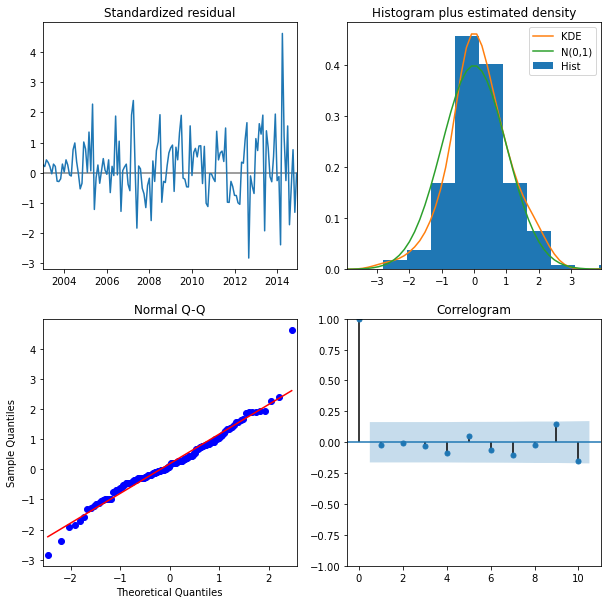

In [22]:
results = final_model.fit() # SARIMA(3, 0, 1) done training, 3 phis, 1 theta
results.plot_diagnostics(figsize=(10,10))
plt.show()
# Property of Normal Distribution/Gaussian Distribution
# 1. Constant Mean
# 2. Constant variance
# Notation, a normal/gaussian distribution of mean mu and
# standard deviation of sigma is denoted as N(mu, sigma)
# N(2, 4) --> Normal/Gaussian distribution with constant mean of 2 and
# constant standard deviation of 4
# N(0, 1) --> Normal/Gaussian distribution with constant mean of 0 and
# constant standard deviation of 1 --> N(0, 1) is popularly known as
# standard normal/gaussian distribution
# Correlation/Covariance -- picture of correlations --> correlogram
# 'gram' --> picture
# 'hist' --> counts

In [23]:
results.mse

423.8502620644351

In [28]:
prediction = results.get_prediction(start='2003-01-01')
prediction.predicted_mean

# SARIMA(3, 0 , 1) --> AR(3), 3 previous values

# 2003-01-01    141
# 2003-02-01    157
# 2003-03-01    185
# 2003-04-01    199
# 2003-05-01    203
#              ... 
# 2014-08-01    848
# 2014-09-01    640
# 2014-10-01    581
# 2014-11-01    519
# 2014-12-01    605

2003-01-01      0.000000
2003-02-01    139.132256
2003-03-01    150.172225
2003-04-01    171.351125
2003-05-01    186.449134
                 ...    
2014-08-01    875.016620
2014-09-01    647.377716
2014-10-01    569.025452
2014-11-01    539.562799
2014-12-01    605.299604
Freq: MS, Length: 144, dtype: float64

In [29]:
forecast = results.get_forecast('2016-01-01') # end-date of forecast
forecast.predicted_mean

2015-01-01    566.017652
2015-02-01    560.361503
2015-03-01    639.170352
2015-04-01    744.044031
2015-05-01    833.204998
2015-06-01    786.628758
2015-07-01    907.517583
2015-08-01    893.151842
2015-09-01    679.833831
2015-10-01    616.317975
2015-11-01    559.775684
2015-12-01    646.192959
2016-01-01    605.056472
Freq: MS, dtype: float64

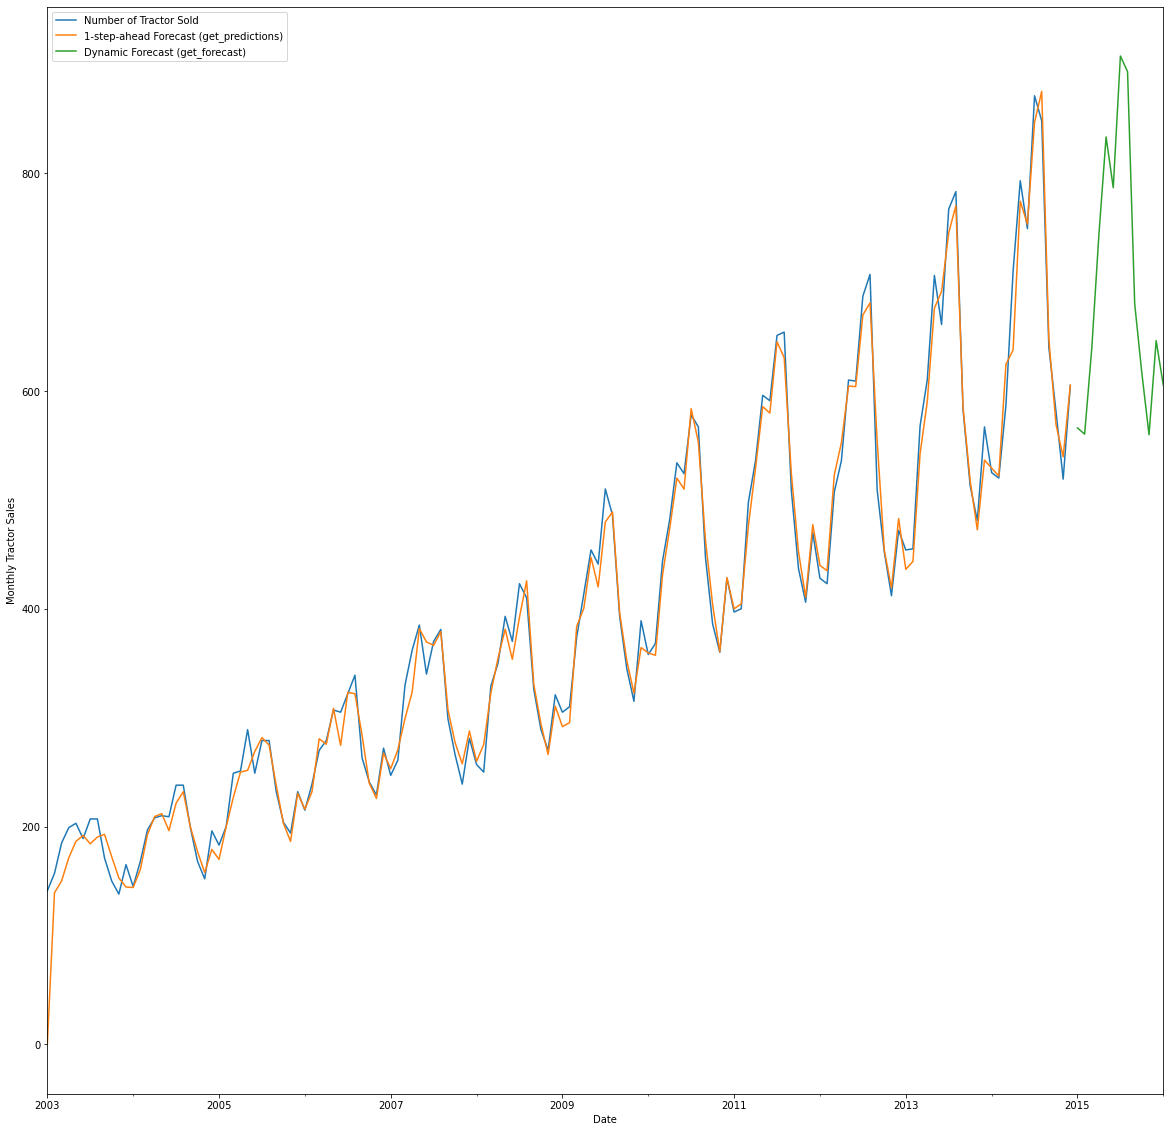

In [27]:
#Plot the predicted values
ax = sales_data['Number of Tractor Sold'].plot(figsize=(20, 20))
prediction.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions)')
forecast.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
plt.ylabel('Monthly Tractor Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

In [30]:
import calendar
def month_number_to_month_name(x):
    return calendar.month_abbr[x]

sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply(month_number_to_month_name)
sales_data['Year'] = dates.year
sales_data

,Month-Year,Number of Tractor Sold,Month,Year
2003-01-01,Jan-03,141,Jan,2003
2003-02-01,Feb-03,157,Feb,2003
2003-03-01,Mar-03,185,Mar,2003
2003-04-01,Apr-03,199,Apr,2003
2003-05-01,May-03,203,May,2003
...,...,...,...,...
2014-08-01,Aug-14,848,Aug,2014
2014-09-01,Sep-14,640,Sep,2014
2014-10-01,Oct-14,581,Oct,2014
2014-11-01,Nov-14,519,Nov,2014


In [31]:
monthly_sales_data = pd.pivot_table(sales_data, values = "Number of Tractor Sold", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


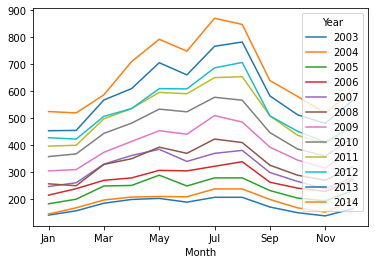

In [32]:
monthly_sales_data.plot()